### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#assigning the necessary csv and excel files to variables

shopify = pd.read_csv('shopify_data_seller2.csv')
vacc_doses = pd.read_csv('astrazeneca-and-moderna-vaccination-doses-by-state.csv')
vacc_pop = pd.read_csv('distribution-of-covid-19-fully-vaccinated-population-in-nigeria.csv')
subnat_covid19 = pd.read_excel('nga_subnational_covid19_hera (1).xlsx')

### Shopify

In [3]:
shopify.head()

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Dominica,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Saint Helena,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [4]:
##Data Overview
shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   page_type            25000 non-null  object 
 1   location_country     25000 non-null  object 
 2   referrer_host        25000 non-null  object 
 3   ua_os                25000 non-null  object 
 4   hour                 25000 non-null  object 
 5   total_orders_placed  25000 non-null  int64  
 6   total_checkouts      25000 non-null  int64  
 7   total_carts          25000 non-null  int64  
 8   total_sessions       25000 non-null  int64  
 9   total_pageviews      25000 non-null  int64  
 10  total_conversion     25000 non-null  float64
 11  total_bounce_rate    25000 non-null  float64
 12  ua_form_factor       25000 non-null  object 
 13  referrer_source      10491 non-null  object 
 14  referrer_name        4972 non-null   object 
dtypes: float64(2), int64(5), object(8)
m

### EDA

In [44]:
## Evaluating the operating system (OS) in demand 

shopify_ops = pd.DataFrame(shopify.groupby('ua_os')['total_orders_placed'].sum())

shopify_ops = shopify_ops.sort_values(by = 'total_orders_placed', ascending = True).nlargest(7, 'total_orders_placed')
shopify_ops = shopify_ops.reset_index()
shopify_ops

,ua_os,total_orders_placed
0,Android,7866
1,Other,1344
2,Mac OS X,377
3,iOS,369
4,Chrome OS,207
5,Windows,97
6,Linux,49


### Visualizing insight

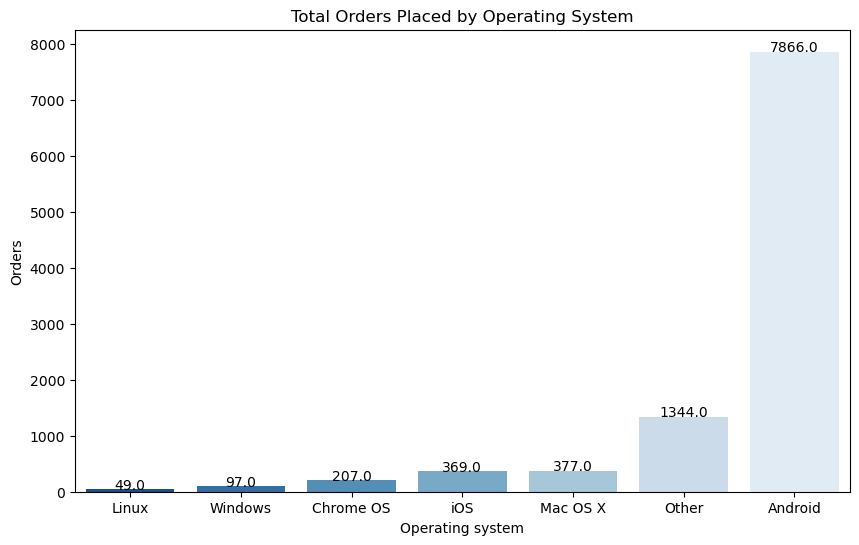

In [45]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Width: 10, Height: 6

ax = sns.barplot(x='ua_os', y='total_orders_placed', data= shopify_ops,hue = 'ua_os', palette ='Blues', legend = False,
                 order=shopify_ops.sort_values('total_orders_placed')['ua_os'])

# Add data labels
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X-coordinate of the bar
        p.get_height() + 0.5,  # Y-coordinate of the bar
        f'{p.get_height():.1f}',  # Text (formatted to 1 decimal place)
        ha='center'  # Center alignment
    )
# Customize the chart
plt.title('Total Orders Placed by Operating System')
plt.xlabel('Operating system')
plt.ylabel('Orders')
plt.show()

### Vaccination Population

In [46]:
vacc_pop.head()

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
0,Abia,"3,727,347",56852,"34,029","22,823"
1,Adamawa,"4,248,436",68510,"39,852","28,658"
2,Akwa Ibom,"5,482,177",66166,"41,134","25,032"
3,Anambra,"5,527,809",60382,"41,334","19,048"
4,Bauchi,"6,537,314",97045,"65,625","31,420"


In [71]:
##Data Overview
vacc_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              37 non-null     object
 1   Population                         37 non-null     int32 
 2   Total Vaccinated Population        37 non-null     int64 
 3   First Dose (Partially Vaccinated)  37 non-null     int32 
 4   Second Dose (Fully Vaccinated)     37 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


In [48]:
## Data Transformation; Data type conversion etc 

vacc_pop['Population'] = vacc_pop['Population'].str.replace(',', '').astype(int)
vacc_pop['First Dose (Partially Vaccinated)'] = vacc_pop['First Dose (Partially Vaccinated)'].str.replace(',','').astype(int)
vacc_pop['Second Dose (Fully Vaccinated)'] = vacc_pop['Second Dose (Fully Vaccinated)'].str.replace(',','').astype(int)

In [49]:
##Data Overview
vacc_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              37 non-null     object
 1   Population                         37 non-null     int32 
 2   Total Vaccinated Population        37 non-null     int64 
 3   First Dose (Partially Vaccinated)  37 non-null     int32 
 4   Second Dose (Fully Vaccinated)     37 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


### EDA

In [51]:
##  Evaluating the most states that were fully vaccinated

top5_states = vacc_pop.nlargest(5, 'Second Dose (Fully Vaccinated)')
top5_states

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
24,Lagos,12000598,647788,404414,243374
14,Federal Capital Territory,3564126,249284,154453,94831
19,Kano,15076892,181145,106588,74557
18,Kaduna,8252366,176183,108707,67476
30,Oyo,7840864,163636,100172,63464


### Visualization

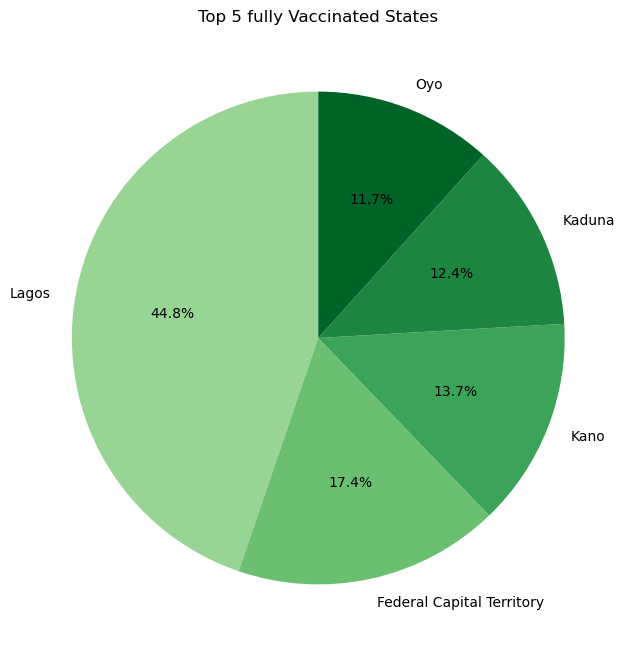

In [57]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_states['Second Dose (Fully Vaccinated)'],  # Values for the pie chart
    labels=top5_states['State'],  # Labels for the slices
    autopct='%1.1f%%',  # Percentage display format
    startangle=90,  # Start angle of the pie chart
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(top5_states)))
)

# Add a title
plt.title('Top 5 fully Vaccinated States')
plt.show()

### Subnational Covid 19 (NG)

In [58]:
subnat_covid19.head()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE
0,1,2020-02-27,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,2020-02-27,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,2020-02-27,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,2020-02-27,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,2020-02-27,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


In [59]:
##Data transformation; 
#Renaming french columns to english
subnat_covid19.rename( columns= {'PAYS':'COUNTRY',
                                 'CONTAMINES': 'INFECTED',
                                 'DECES': 'DEATH',
                                 'GUERIS': 'RECOVERED',
                                 'CONTAMINES_FEMME':'INFECTED_FEMALE',
                                 'CONTAMINES_HOMME' : 'INFECTED_MALE',
                                 'CONTAMINES_GENRE_NON_SPECIFIE':'INFECTED_GENDER_NOT_SPECIFIED',
                                 'ID_PAYS':'Country_ID'}, inplace = True)


In [60]:
subnat_covid19.head()

,ID,DATE,ISO_3,COUNTRY,Country_ID,REGION,ID_REGION,INFECTED,DEATH,RECOVERED,INFECTED_FEMALE,INFECTED_MALE,INFECTED_GENDER_NOT_SPECIFIED,SOURCE
0,1,2020-02-27,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,2020-02-27,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,2020-02-27,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,2020-02-27,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,2020-02-27,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


### EDA

In [66]:
death_state = pd.DataFrame(subnat_covid19.groupby('REGION')['DEATH'].sum()).nlargest(7, 'DEATH')
death_state

,DEATH
REGION,
Lagos,769.0
Edo,320.0
Federal Capital Territory,247.0
Oyo,201.0
Rivers,154.0
Kano,126.0
Delta,111.0


### Visualization

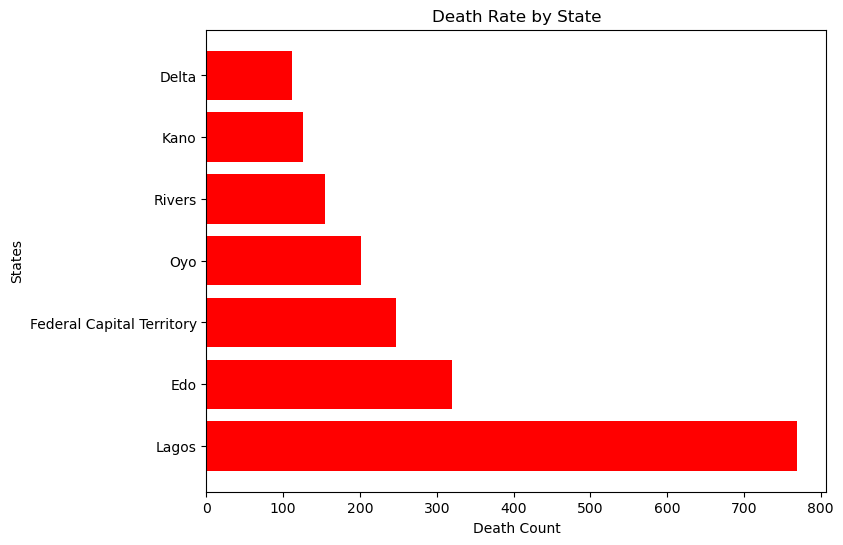

In [74]:
# Create the figure
plt.figure(figsize=(8, 6))

# Create a horizontal bar chart
plt.barh(death_state.index, death_state['DEATH'], color='red')

# Add labels and title
plt.xlabel('Death Count')
plt.ylabel('States')
plt.title('Death Rate by State')

# Show the plot
plt.show()